### Car_Price_Prediction

#### Problem Statement:-

The objective is to create a linear regression model that can accurately predict the price of a car based on different features. The model will be used by a car dealership to provide potential buyers with an estimated price for their trade-ins and to determine appropriate listing prices for the cars they sell.

#### Importing Libraries:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [80]:
!pip install optimal-data-selector

In [81]:
from optimal_data_selector.optimal import OptimalDataSelector

#### Importing Data

In [2]:
data = pd.read_csv("C:\\Users\\Hp\\OneDrive\\Documents\\Ds_Data//CarPrice_Assignment.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
# See top 10 records
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# See random 5 records 
data.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
75,76,1,mercury cougar,gas,turbo,two,hatchback,rwd,front,102.7,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
98,99,2,nissan clipper,gas,std,two,hardtop,fwd,front,95.1,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249.0
172,173,2,toyota cressida,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,17669.0


In [5]:
data.shape

(205, 26)

In [6]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [9]:
# To see information of categorical variable
data.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [10]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

From above output we can show that there is no any null values available in data

In [11]:
data.duplicated().sum()

0

In [12]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
# Checking length of Unique Value for each column
for i in data.columns:
    print(i ,':' ,(data[i].nunique()))

car_ID : 205
symboling : 6
CarName : 147
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
wheelbase : 53
carlength : 75
carwidth : 44
carheight : 49
curbweight : 171
enginetype : 7
cylindernumber : 7
enginesize : 44
fuelsystem : 8
boreratio : 38
stroke : 37
compressionratio : 32
horsepower : 59
peakrpm : 23
citympg : 29
highwaympg : 30
price : 189


#### Data Preprocessing

In [14]:
len(data['car_ID'])

205

In [15]:
data.drop(['car_ID'], axis = 1, inplace = True)

In [16]:
data['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [17]:
print(len(data['CarName'].unique()))
data['CarName'].unique()

147


array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Here, we make a separate columns for car company

In [18]:
data['Company'] = data.CarName.str.split(expand = True)[0]

In [19]:
del data['CarName']

In [20]:
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [21]:
print(data.Company.nunique())
data['Company'].unique()

28


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [22]:
data['Company'].replace(['maxda', 'nissan', 'porcshce', 'toyouta', 'vokswagen', 'vw'],
                        ['mazda', 'Nissan', 'porsche', 'toyota', 'volkswagen', 'volkswagen'],
                        regex=True, inplace=True)
data['Company'].nunique()


22

In [23]:
data['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

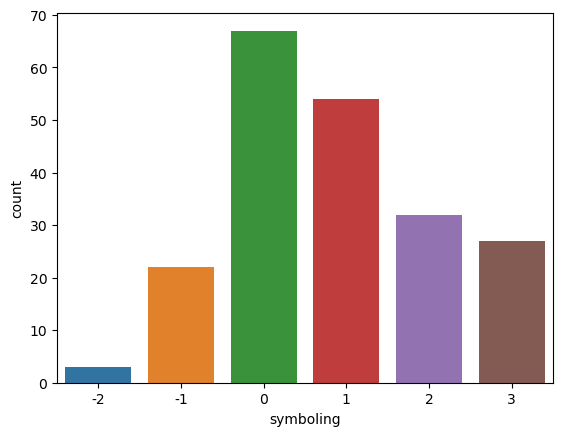

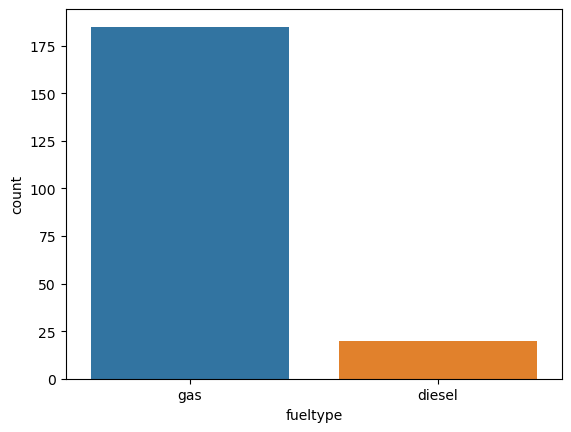

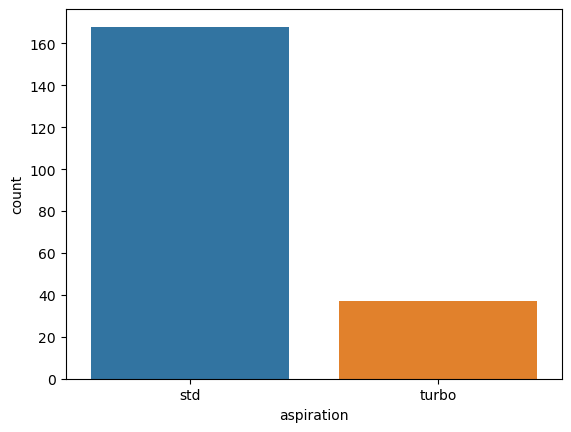

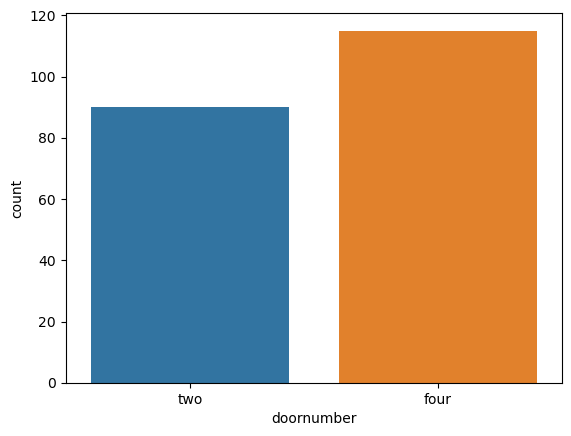

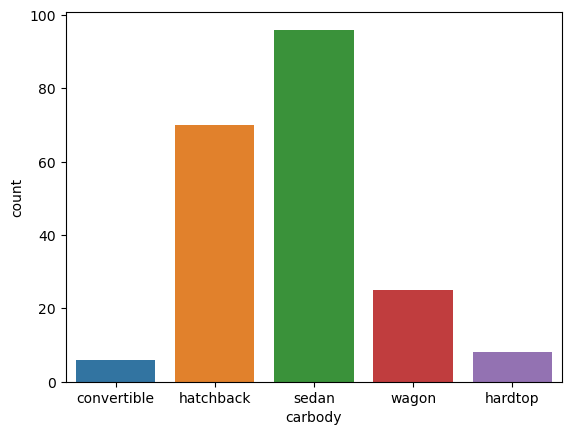

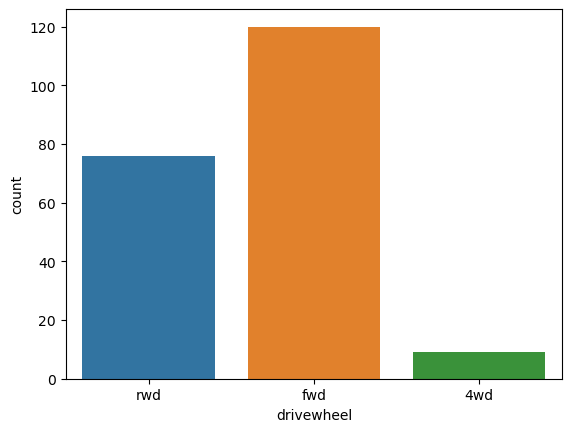

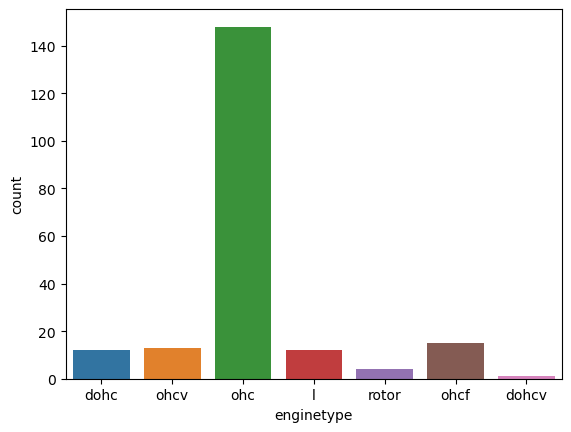

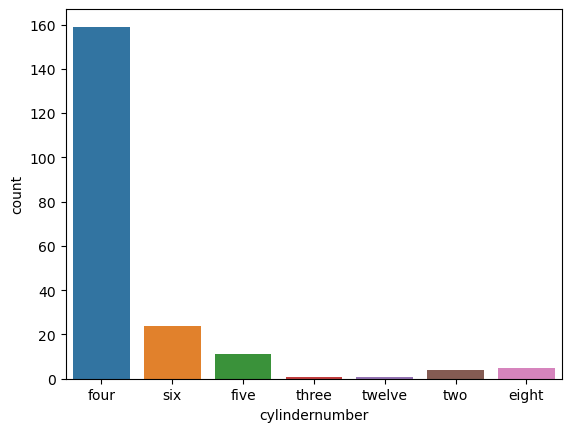

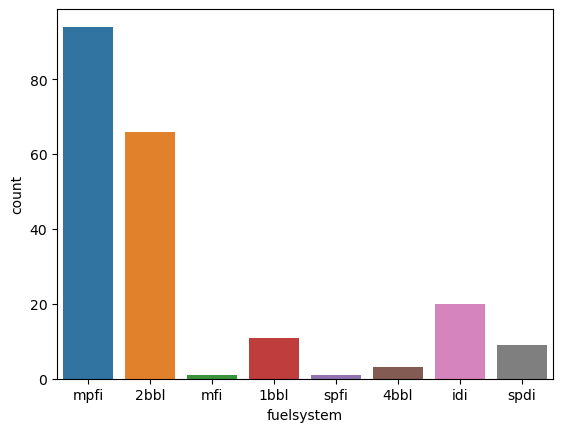

In [24]:
for i in data[['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem']]:
    sns.countplot(data[i])
    plt.show()


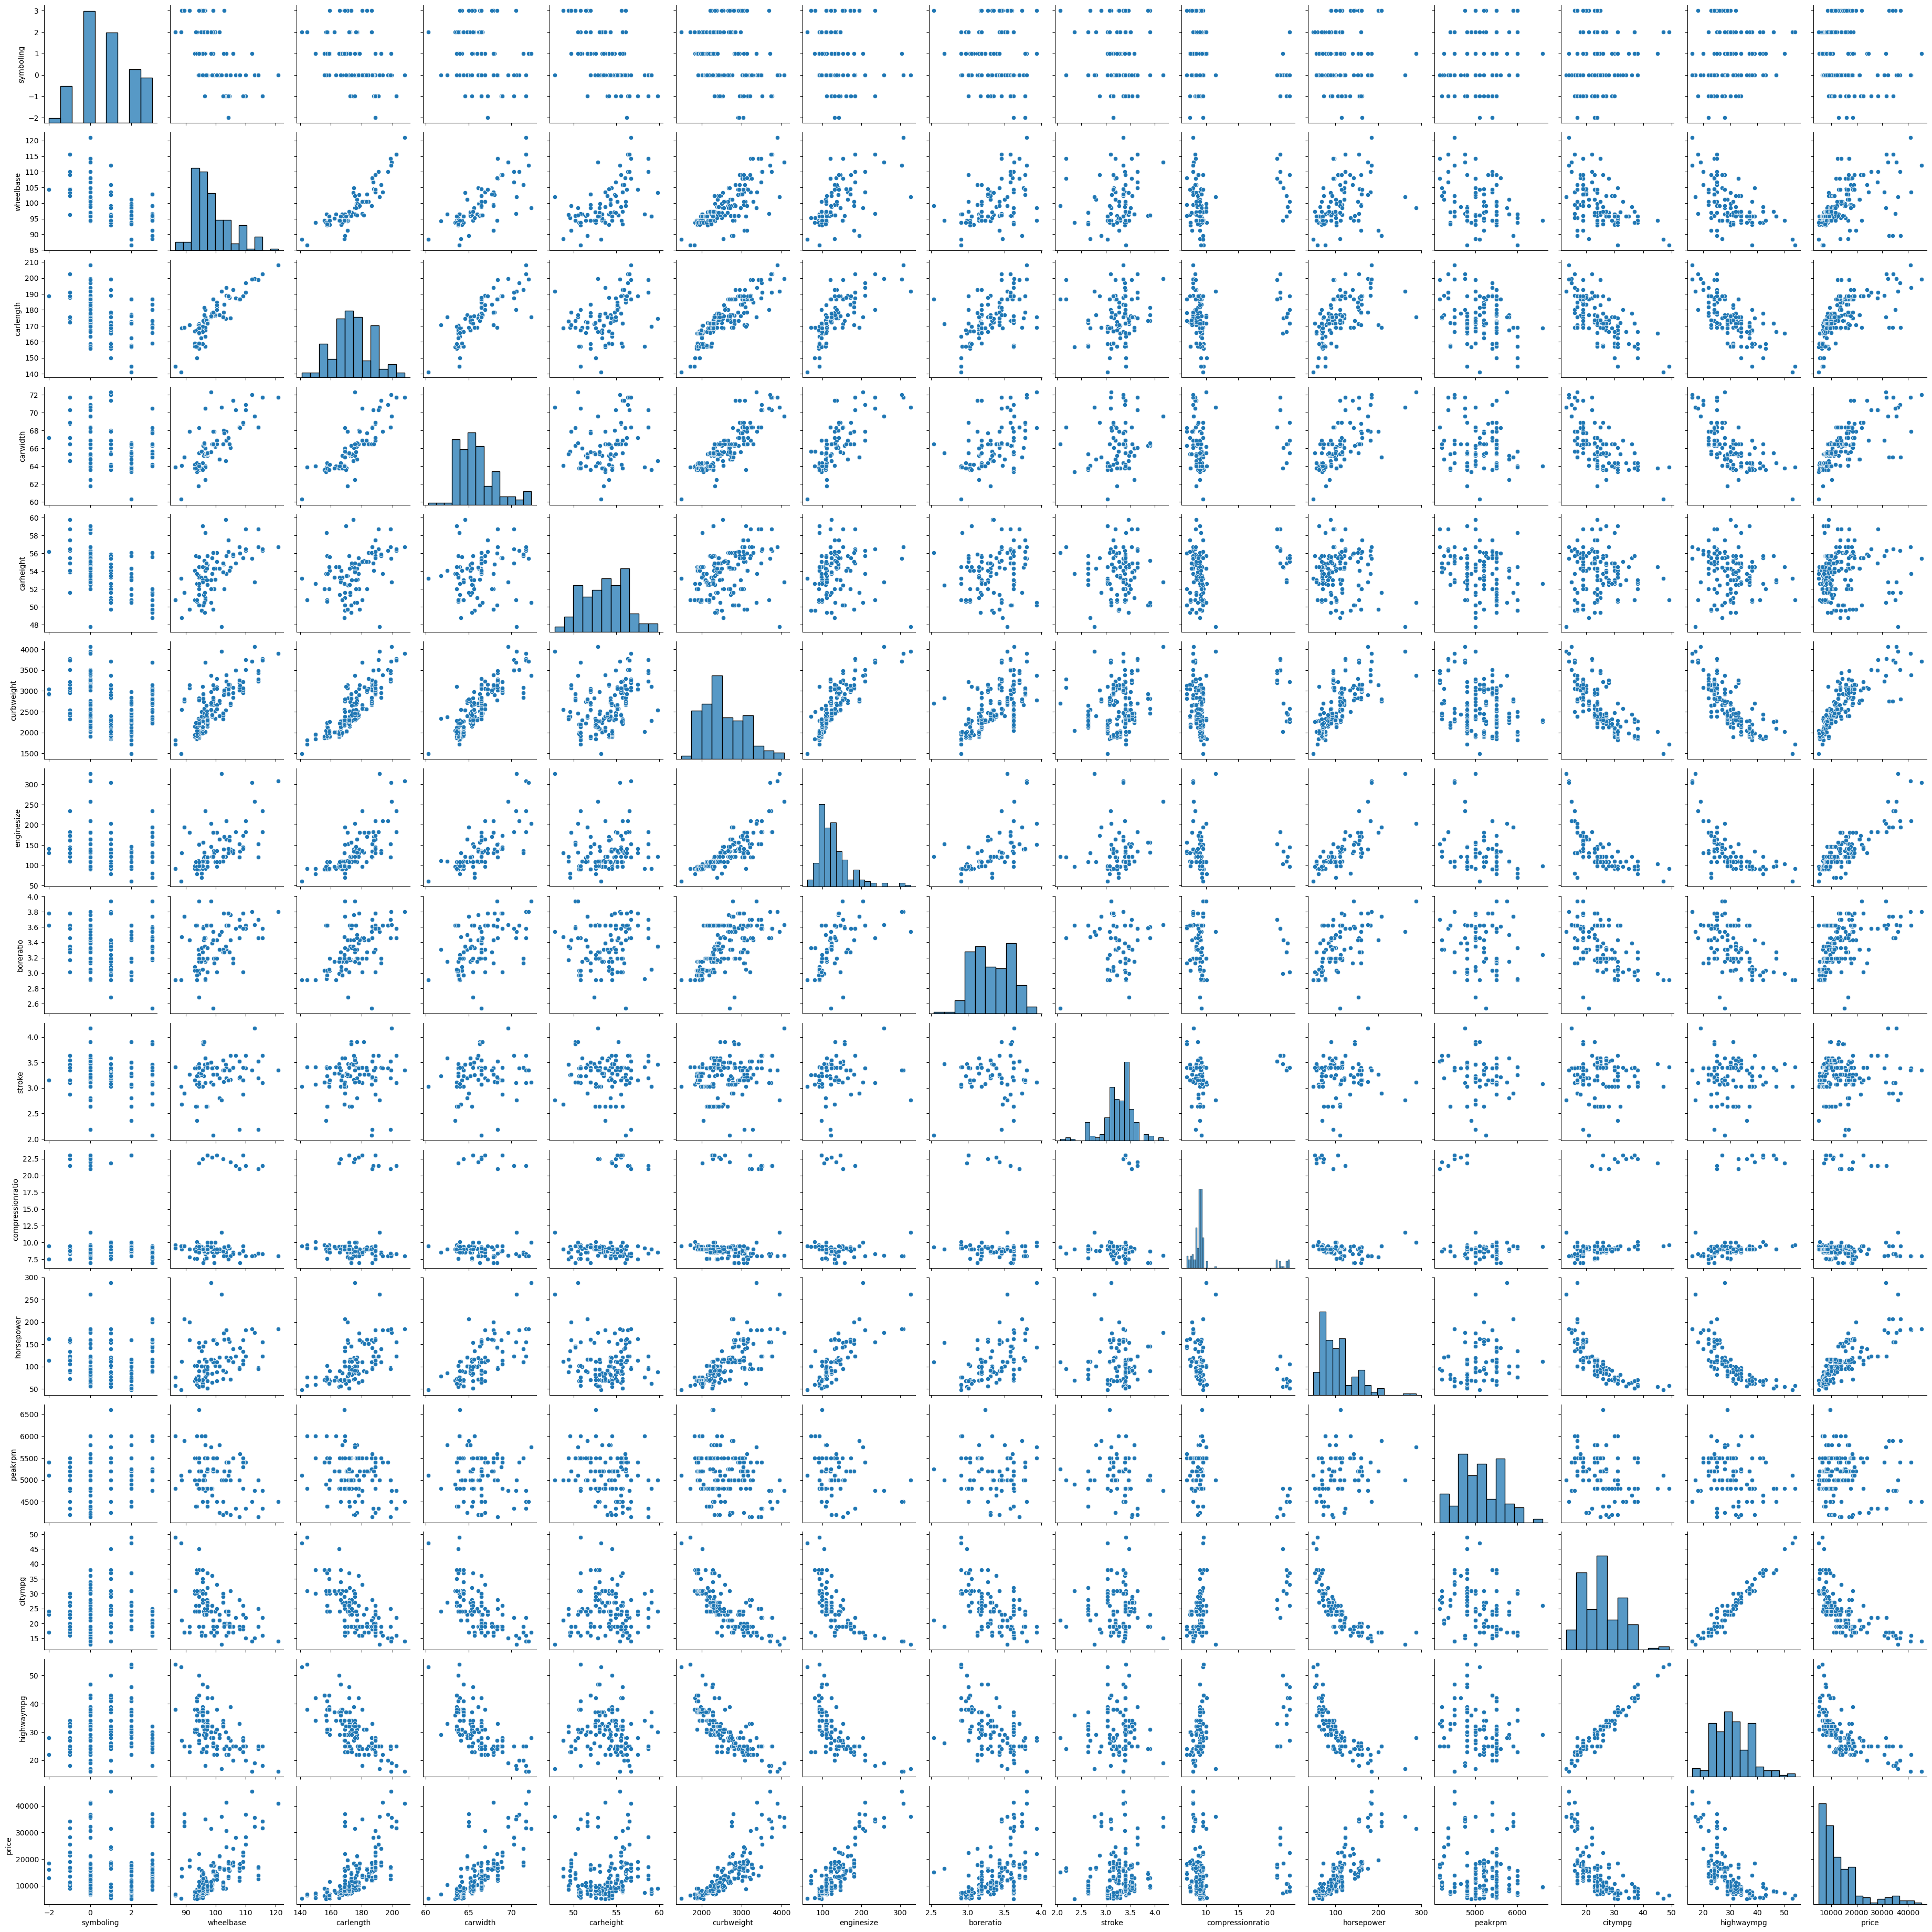

In [25]:
#Pairplot of all numerical variables
sns.pairplot(data)
plt.show()

<AxesSubplot:>

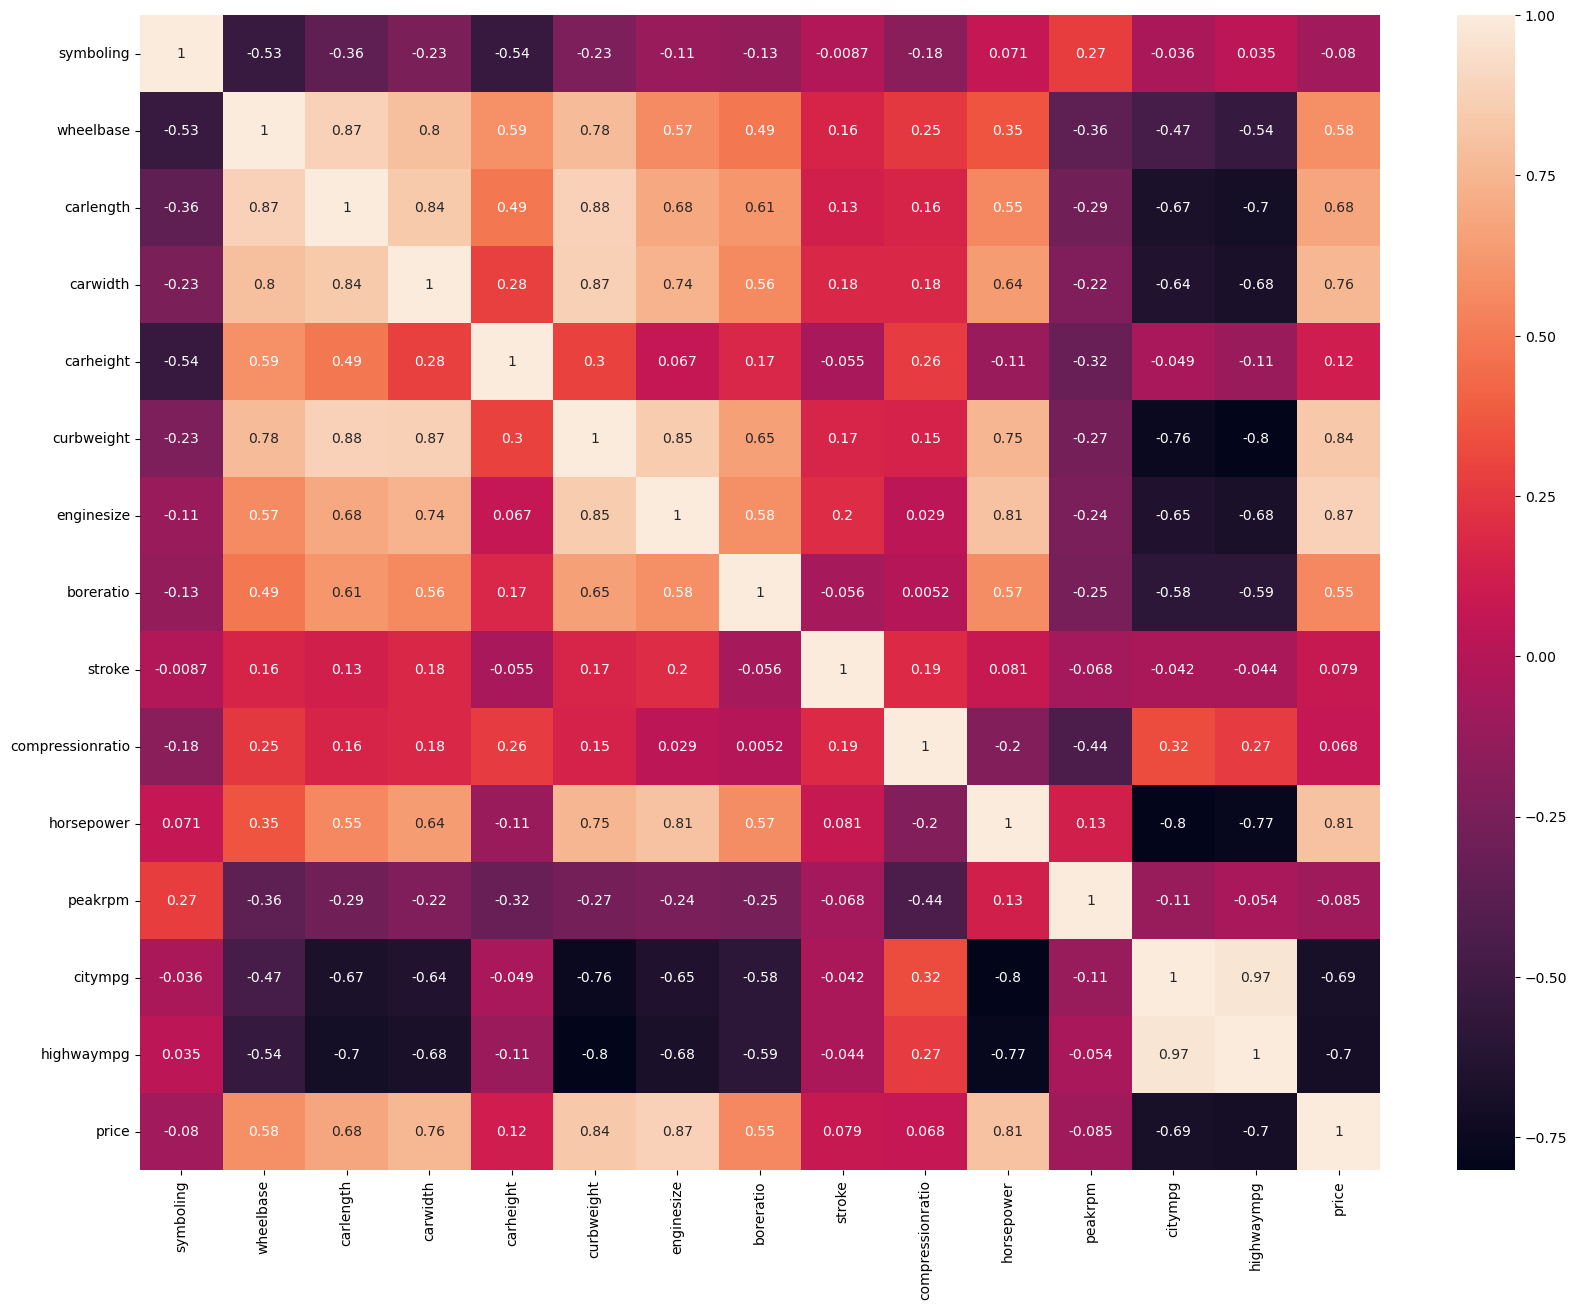

In [26]:
# Now plot the heatmap to the correlation of the data
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

In [27]:
# Now convert categorical data into numarical data
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=lab.fit_transform(data[i])
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,5,3.78,3.15,9.5,114,5400,23,28,16845.0,21
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,...,5,3.78,3.15,8.7,160,5300,19,25,19045.0,21
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,5,3.58,2.87,8.8,134,5500,18,23,21485.0,21
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,...,3,3.01,3.40,23.0,106,4800,26,27,22470.0,21


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
# Check the multicolinearity by using VIF
df = data.drop(['price'],axis=1)
vif=pd.DataFrame({'variables':df.columns})
vif['vif']=[variance_inflation_factor(df.values,i)
           for i in range(len(df.columns))]
vif

,variables,vif
0,symboling,4.112941
1,fueltype,838.652048
2,aspiration,3.462621
3,doornumber,5.006293
4,carbody,28.754943
5,drivewheel,17.352301
6,enginelocation,1.788440
7,wheelbase,2947.129141
8,carlength,2363.454281
9,carwidth,5941.579205


In [30]:
vif1 = vif[vif['vif']<=300]
print(vif1)

         variables         vif
0        symboling    4.112941
2       aspiration    3.462621
3       doornumber    5.006293
4          carbody   28.754943
5       drivewheel   17.352301
6   enginelocation    1.788440
12      enginetype   15.018074
13  cylindernumber   16.421934
14      enginesize  143.523484
15      fuelsystem    9.241027
17          stroke  165.739334
19      horsepower  112.332228
23         Company    5.777990


In [31]:
X = data[['symboling','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber',
          'enginesize','fuelsystem','boreratio','stroke','horsepower','peakrpm','Company']]

In [32]:
X

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,Company
0,3,0,1,0,2,0,0,2,130,5,3.47,2.68,111,5000,1
1,3,0,1,0,2,0,0,2,130,5,3.47,2.68,111,5000,1
2,1,0,1,2,2,0,5,3,152,5,2.68,3.47,154,5000,1
3,2,0,0,3,1,0,3,2,109,5,3.19,3.40,102,5500,2
4,2,0,0,3,0,0,3,1,136,5,3.19,3.40,115,5500,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,0,3,2,0,3,2,141,5,3.78,3.15,114,5400,21
201,-1,1,0,3,2,0,3,2,141,5,3.78,3.15,160,5300,21
202,-1,0,0,3,2,0,5,3,173,5,3.58,2.87,134,5500,21
203,-1,1,0,3,2,0,3,3,145,3,3.01,3.40,106,4800,21


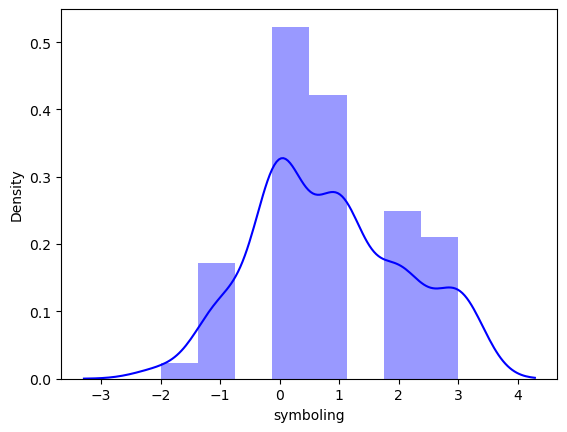

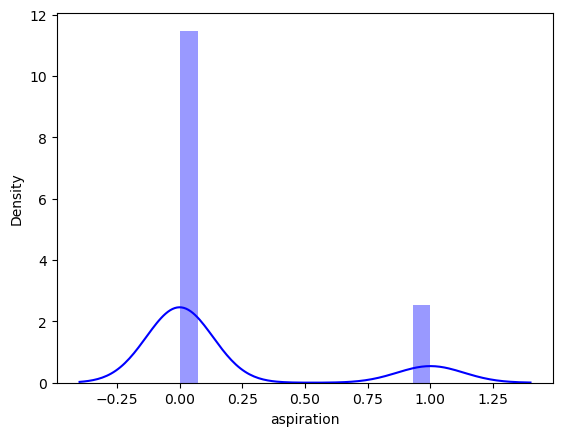

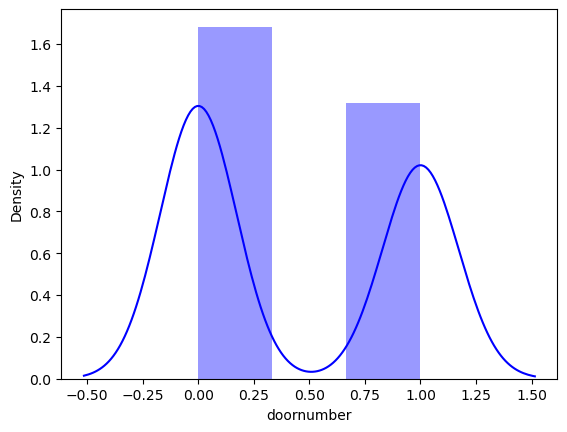

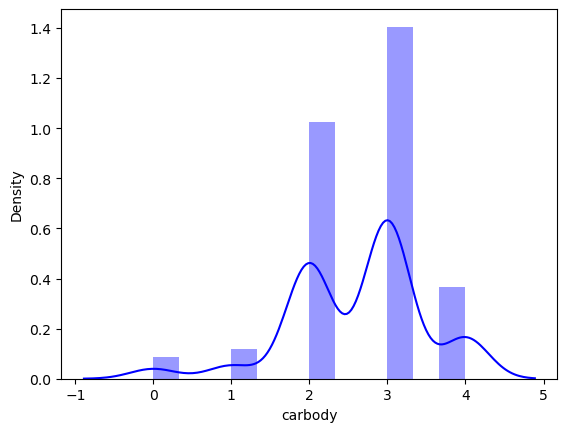

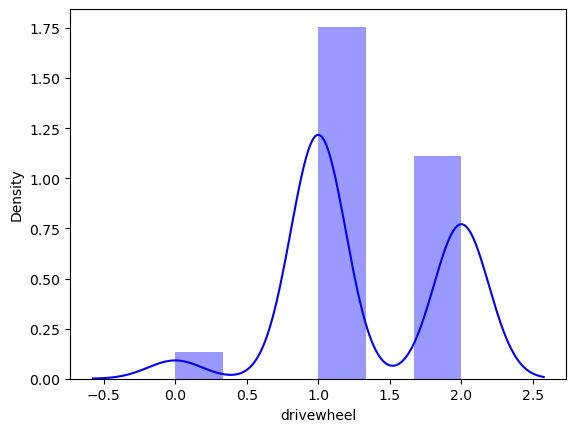

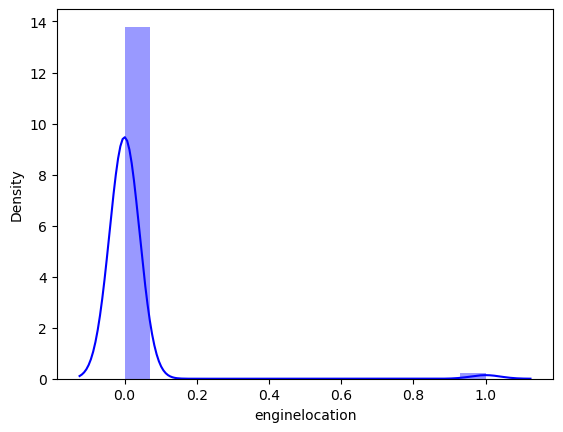

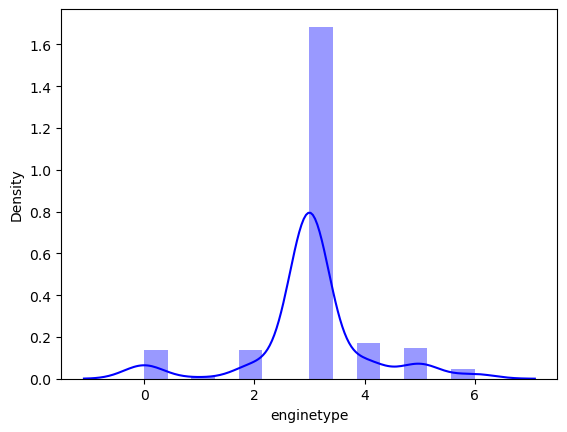

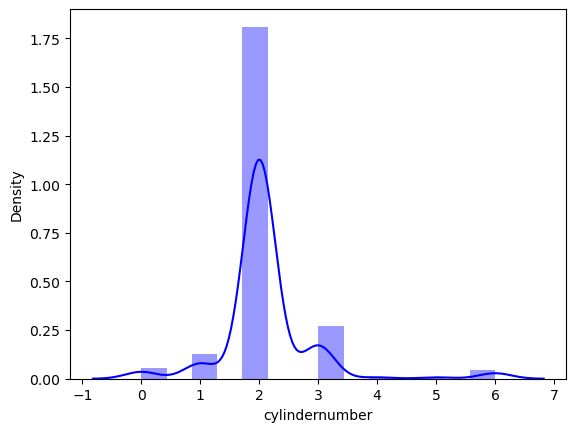

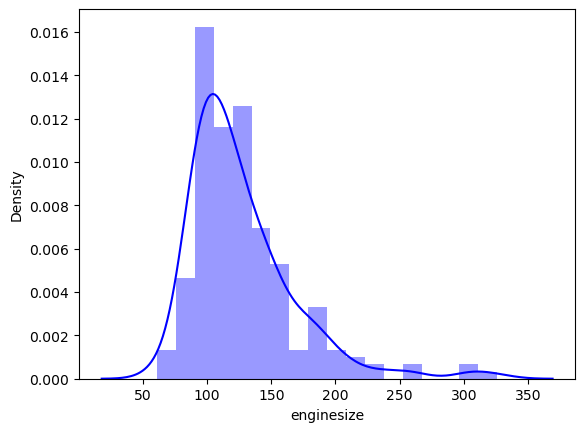

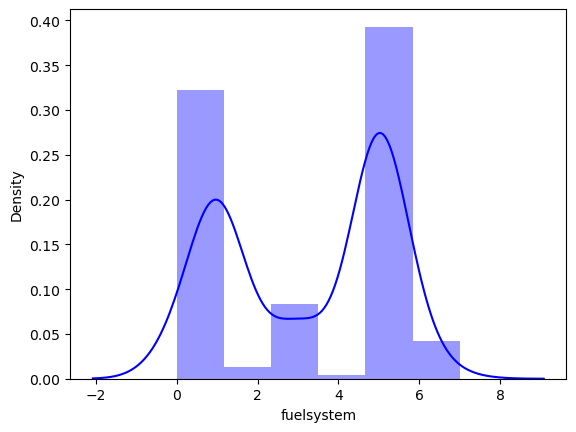

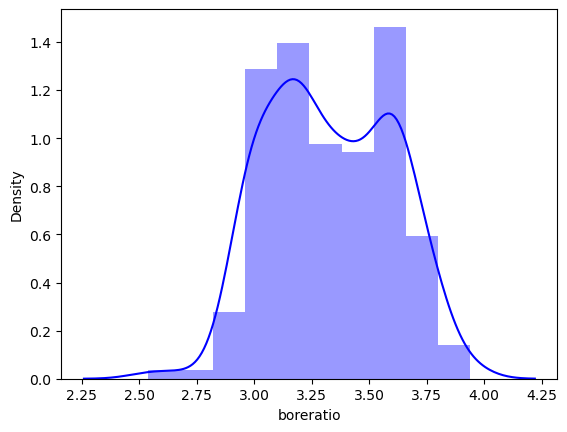

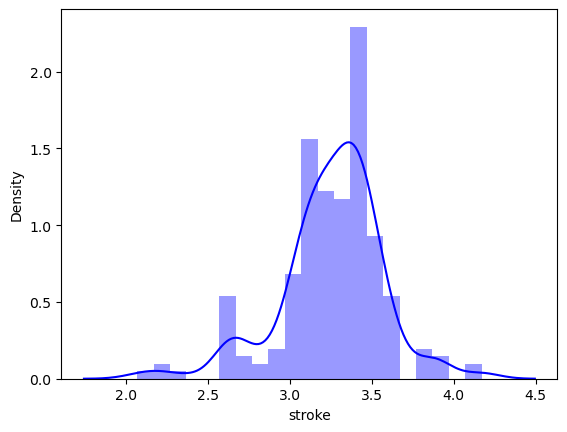

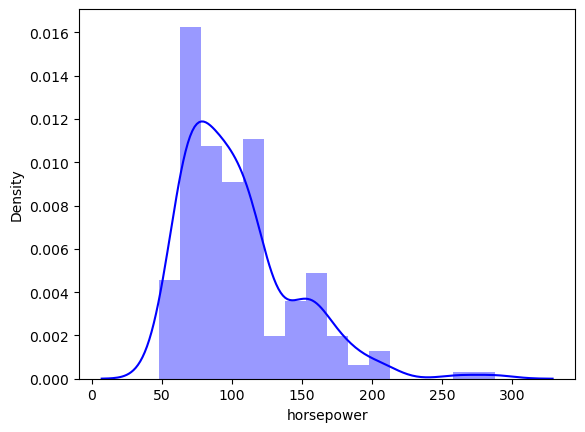

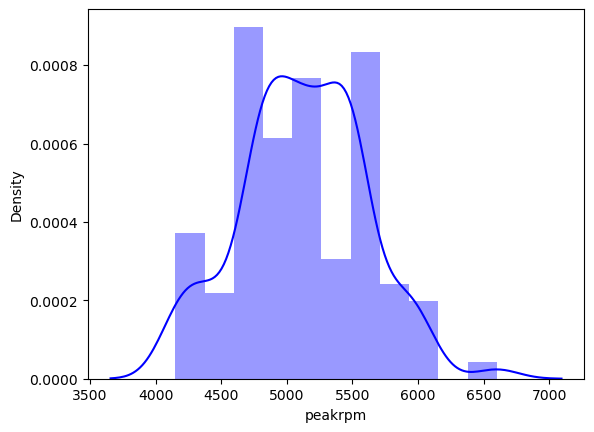

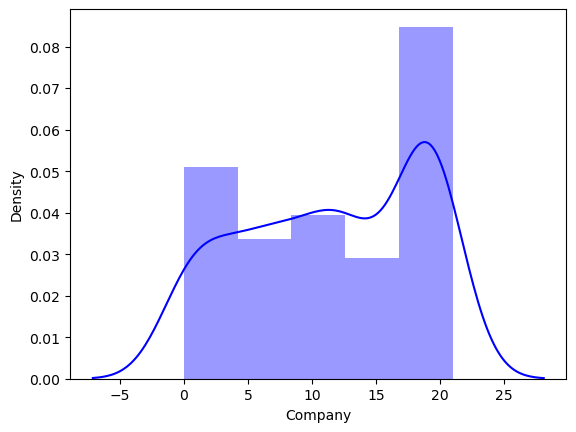

In [33]:
# See the skewness in the data
for i in X.columns:
    sns.distplot(X[i],color="blue")
    plt.show()

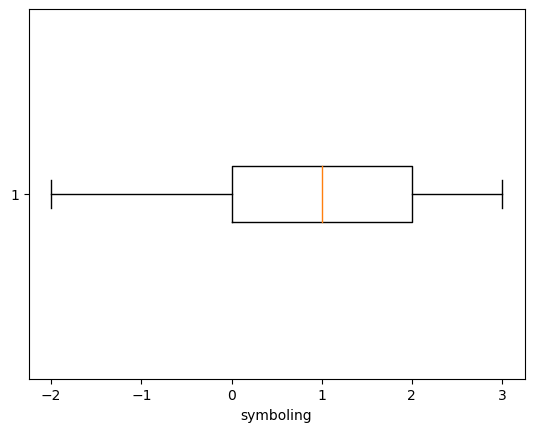

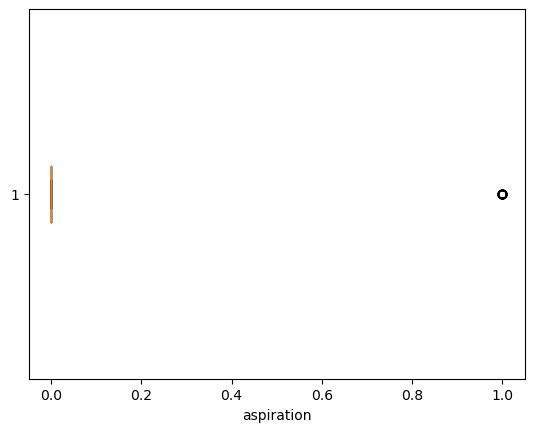

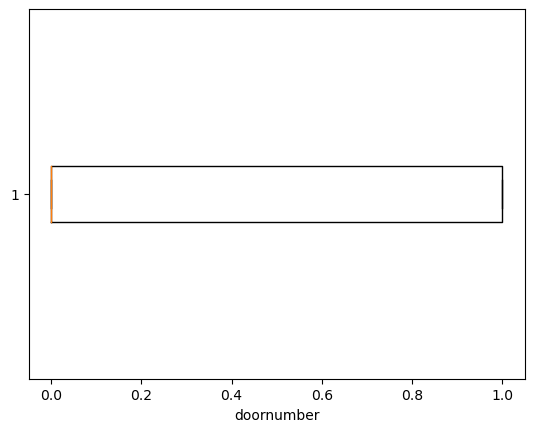

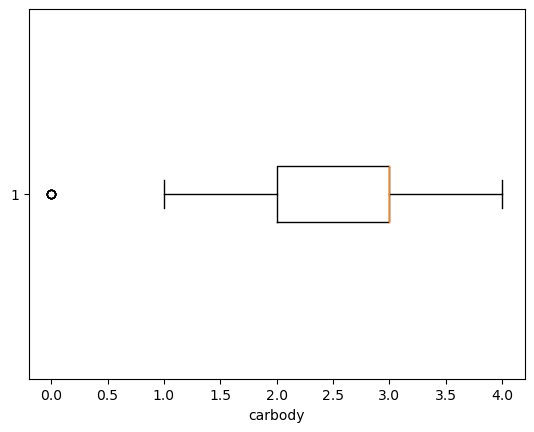

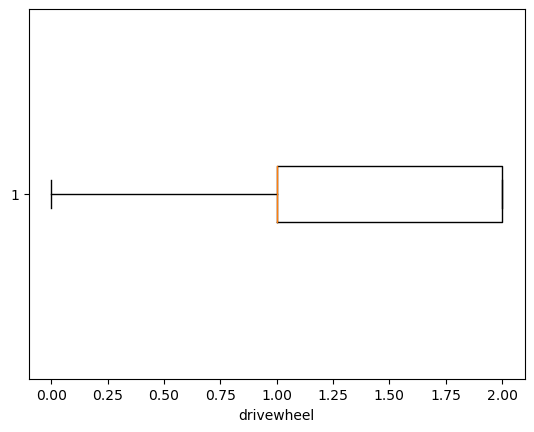

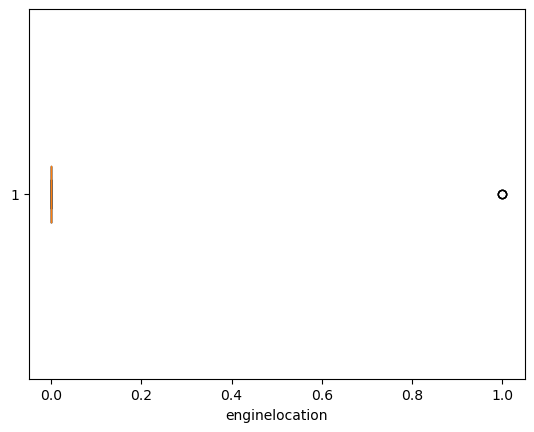

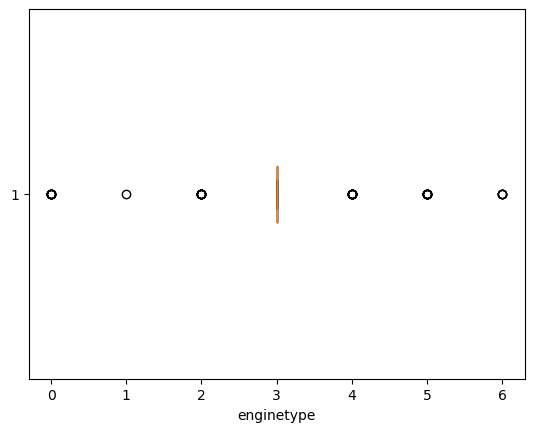

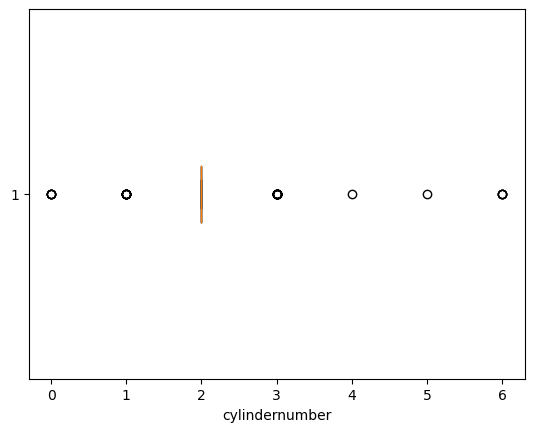

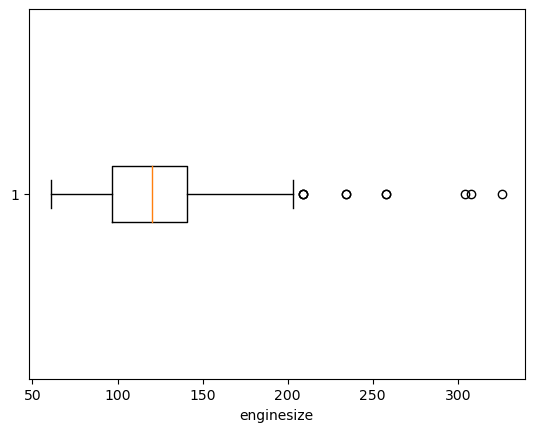

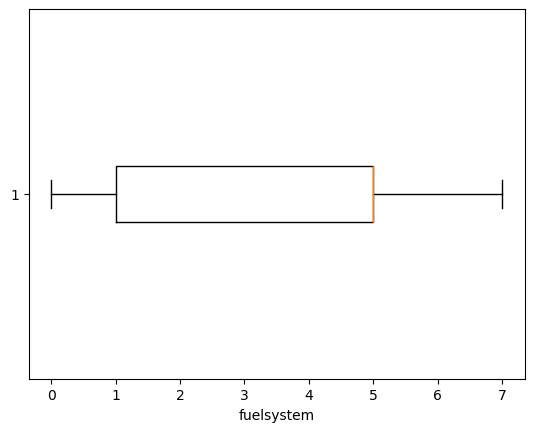

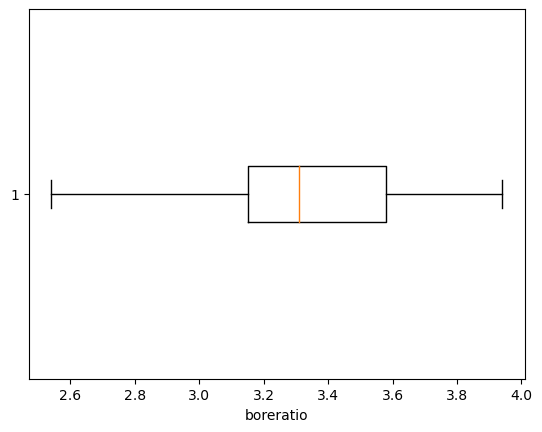

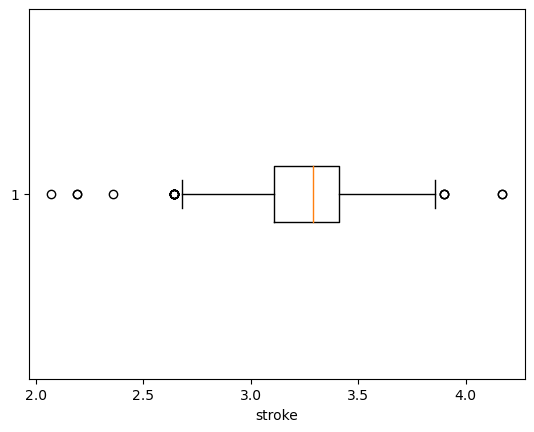

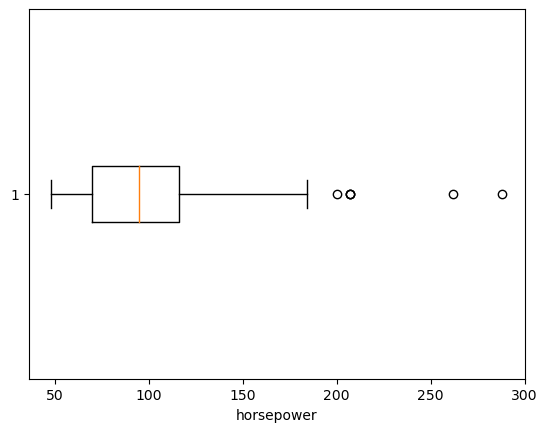

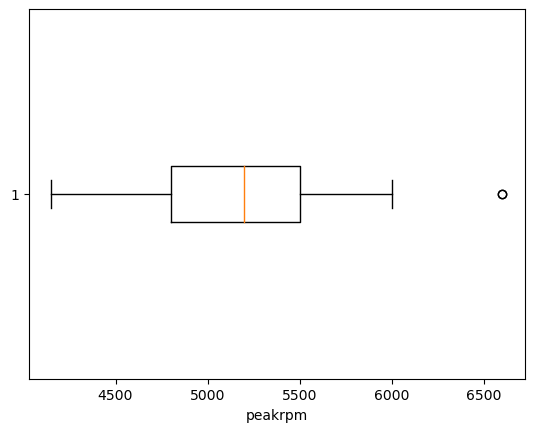

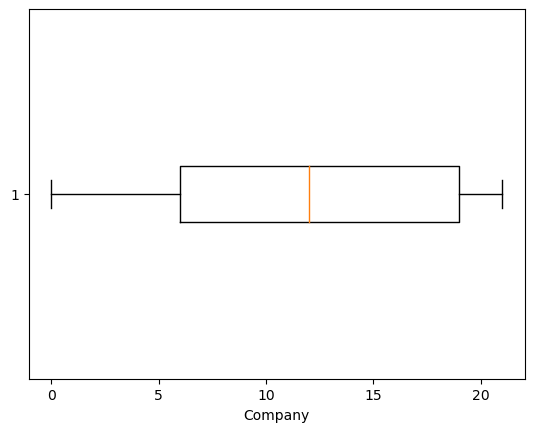

In [34]:
# Now plot the boxplot to see the outliers
for i in X.columns:
    plt.boxplot(X[i], vert=False) # vert false = to show the boxplot horizontally
    plt.xlabel(i)
    plt.show()

In [35]:
Y = data['price']
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

#### Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X1 = std.fit_transform(X)
X1

array([[ 1.74347043, -0.46929532,  1.13038833, ...,  0.17448278,
        -0.26296022, -1.54133064],
       [ 1.74347043, -0.46929532,  1.13038833, ...,  0.17448278,
        -0.26296022, -1.54133064],
       [ 0.133509  , -0.46929532,  1.13038833, ...,  1.26453643,
        -0.26296022, -1.54133064],
       ...,
       [-1.47645244, -0.46929532, -0.88465174, ...,  0.75753473,
         0.78785546,  1.37220354],
       [-1.47645244,  2.13085442, -0.88465174, ...,  0.04773235,
        -0.68328649,  1.37220354],
       [-1.47645244,  2.13085442, -0.88465174, ...,  0.25053303,
         0.57769233,  1.37220354]])

#### Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y,train_size=0.85,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((174, 15), (31, 15), (174,), (31,))

In [82]:
x_train1, x_test1, y_train1, y_test1 = OptimalDataSelector(X1, Y, train_size=0.85,combination=8000,bs_problem='reg' )

Accuracy can be ~ 0.9421398414324011
Computation time = 1.1118407209714254  mints


#### Simple Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train1,y_train1)

LinearRegression()

In [84]:
print("slope value are="+str(lm.coef_))
print("The intercept is="+str(lm.intercept_))

slope value are=[  -9.1499593   941.60207326 -862.43194226 -261.56897045 1416.85336171
  833.17850693  329.06618228 -335.65318855 5371.76460056  152.18317167
 -120.7476275  -962.20473421  778.2901049   699.66995849 -684.55651667]
The intercept is=13180.791487157338


In [85]:
# Predicting "y_pred" that is "charges" column
y_pred=lm.predict(x_test1)
y_pred

array([ 8263.51383476,  9103.65493598, 33583.22069638,  9103.65493598,
       40985.58366889,  8405.59161114,  9549.21442779,  5072.22877679,
       10404.69844377, 10648.43315427, 28952.77047483, 11383.70479708,
       10504.2873268 , 16067.77342866,  8694.43764351, 13675.49358854,
        7199.26727001,  5964.35195323,  5964.35195323, 20006.60543662,
       10211.98460688,  8272.86215475,  6479.93736556, 23554.38982363,
        7567.04411717,  7199.26727001, 10816.6104718 ,  6881.67296582,
        8286.69840884,  3724.84486228,  7911.93746227])

In [86]:
# Performance Matrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test1,y_pred)
mae=mean_absolute_error(y_test1,y_pred)
rmse=(mse)**1/2

print("MSE=",mse)
print("MAE=",mae)
print("RMSE=",rmse)


MSE= 5201048.756229772
MAE= 1692.9656630730728
RMSE= 2600524.378114886


In [87]:
r2=r2_score(y_test1,y_pred)
r2

0.9407021021657161

In [88]:
lm.score(x_train1,y_train1)


0.8206036866172525

In [89]:
adjr2=1-(1-r2)*(len(y_test1)-1)/(len(y_test1)-x_test1.shape[1]-1)
adjr2

0.8814042043314323

#### Ridge Regression:

In [64]:
from sklearn.linear_model import Ridge

In [90]:
rg = Ridge()
rg.fit(x_train1,y_train1)

Ridge()

In [91]:
rg_pred = rg.predict(x_test1)

In [92]:
rg.score(x_train1, y_train1)

0.8205015803350125

In [93]:
rg.score(x_test1,y_test1)

0.9399500883086379

#### #Dicission Tree

In [96]:
# Without GridsearchCv
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(x_train1,y_train1)

DecisionTreeRegressor()

In [97]:
y_pre_DT=DT.predict(x_test1)

In [98]:
DT.score(x_test1,y_test1)

0.948469655779835

In [99]:
DT.score(x_train1,y_train1)

0.9893465765436342

In [100]:
# With GridSearchCv
grid_pram = {'splitter':['best','random'],
            'max_depth':range(2,5,1),
            'min_samples_split':range(2,5,1),
            'min_samples_leaf':range(1,5,1),
            'ccp_alpha':np.random.rand(20)} 

In [101]:
from sklearn.model_selection import GridSearchCV
Grid_cv=GridSearchCV(estimator=DT, param_grid=grid_pram,n_jobs=1,cv=10)
Grid_cv.fit(x_train1,y_train1)
Grid_cv.best_params_

{'ccp_alpha': 0.33501569222328864,
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [102]:
DT1 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=4, min_samples_split= 2, splitter='best', ccp_alpha=0.33501569222328864 )
DT1.fit(x_train1, y_train1)
DT1.score(x_test1, y_test1)

0.9219732025208245

In [103]:
DT1.score(x_train1, y_train1)

0.9069333086808592

#### # Random forest Regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor(random_state=80)

In [106]:
rf_random.fit(x_train1, y_train1)

RandomForestRegressor(random_state=80)

In [107]:
rf_pred = rf_random.predict(x_test1)

In [109]:
## Mean and R squared Errors 
from sklearn import metrics
print("MAE : ", metrics.mean_absolute_error(y_test1, rf_pred))
print("MSE : ", metrics.mean_squared_error(y_test1, rf_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test1, rf_pred)))
print("R squared : ", metrics.r2_score(y_test1, rf_pred))

MAE :  1074.0565922734254
MSE :  2288532.866536937
RMSE :  1512.7897628345247
R squared :  0.9739081107540548


In [111]:
rf_random.score(x_train1,y_train1)

0.9779542520318036

In [110]:
rf_random.score(x_test1, y_test1)

0.9739081107540548

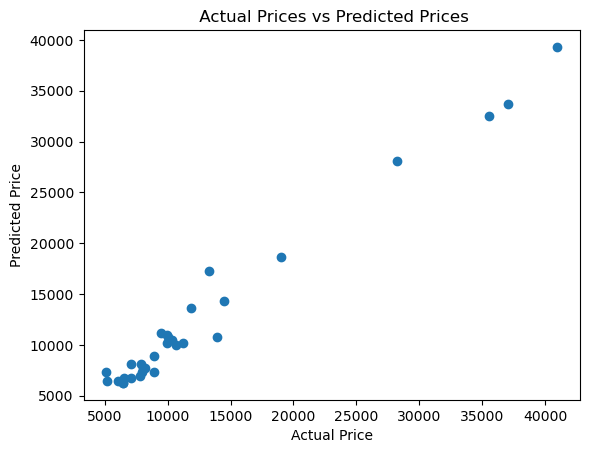

In [113]:
plt.scatter(y_test1, rf_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Here we can see that In Random Forest we got Maximum Accuracy and there is no much difference in the accuracy of training and testing. So we can finalise the model by using Random Forest.